In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/Ananya1/Desktop/IAIML/project/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Visualization and Analysis

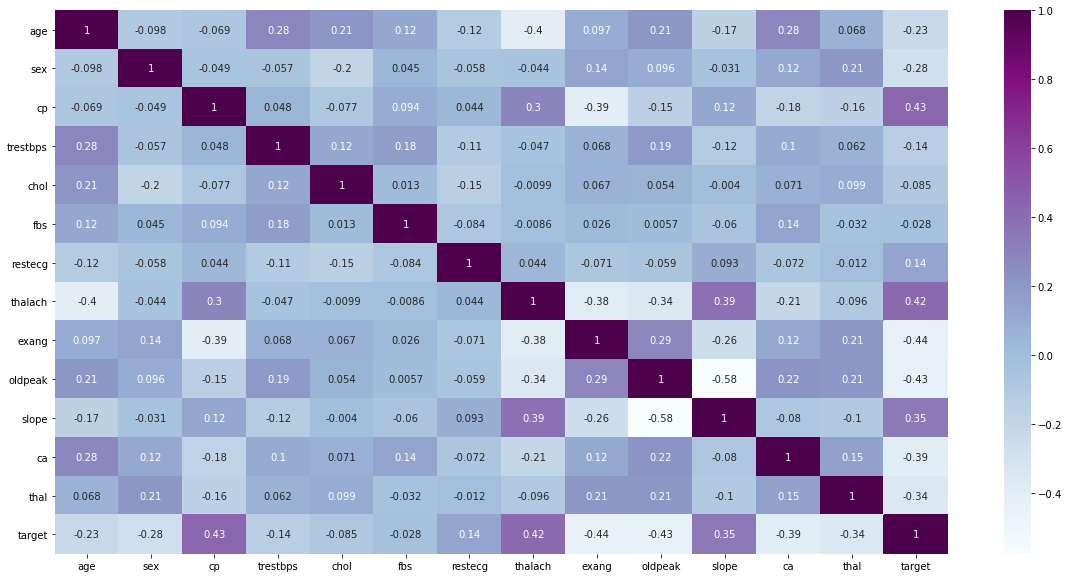

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='BuPu');

In [ ]:
sns.pairplot(data=df);

In [ ]:
df.hist(figsize=(12,12), layout=(5,3));

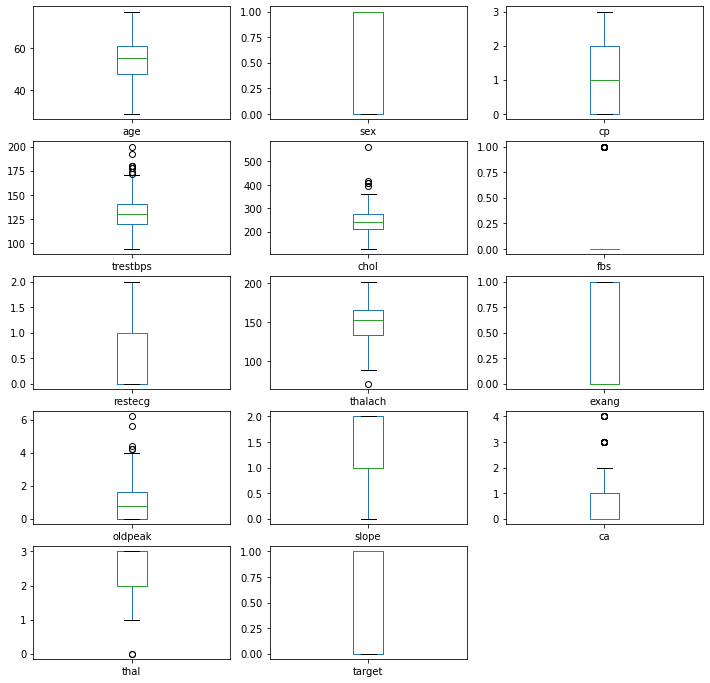

In [15]:
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

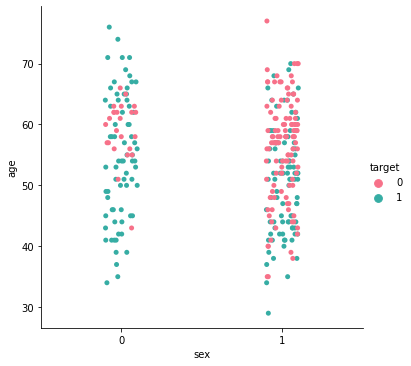

In [16]:
sns.catplot(data=df, x='sex', y='age', hue='target', palette='husl');

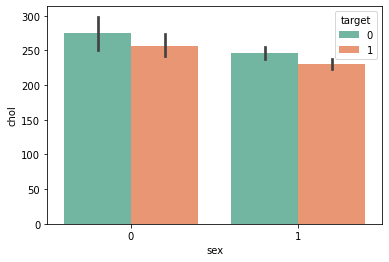

In [17]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='Set2');

In [18]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

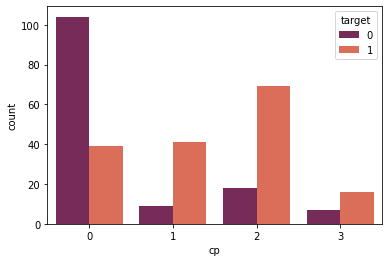

In [20]:
sns.countplot(x='cp', hue='target', data=df, palette='rocket');

In [21]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


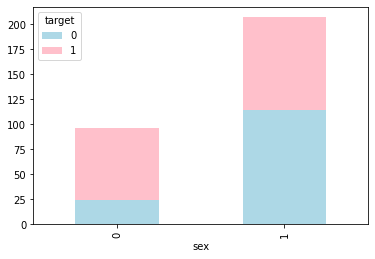

In [22]:
gen.plot(kind='bar', stacked=True, color=['lightblue','pink'], grid=False);

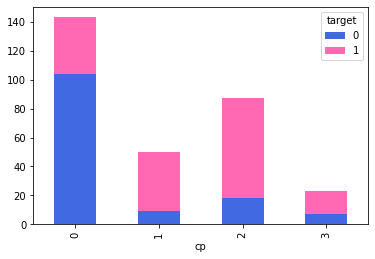

In [7]:
chest_pain.plot(kind='bar', stacked=True, color=['royalblue','hotpink'], grid=False);

In [6]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


# Preparing Data for the model

## Scaling the data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

### Comparison between scaled and unScaled Data

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


## Next Let Us Prepare Our Data for training

In [28]:
x = df.drop(['target'], axis=1)
y = df['target'] 

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 40)

### Check the sample size

In [30]:
print('x_train- ', x_train.size)
print('x_test- ', x_test.size)
print('y_train', y_train.size)
print('y_test', y_test.size)

x_train-  2756
x_test-  1183
y_train 212
y_test 91


### Applying Logistic Regression Algorithm and finding the accuracy, precision and recall of the model

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model1 = lr.fit(x_train,y_train)
prediction1 = model1.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

<AxesSubplot:>

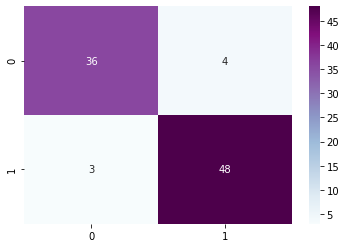

In [33]:
sns.heatmap(cm,annot=True,cmap='BuPu')

In [34]:
TP = cm[0][0]
TN = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
print('Testing Accuracy:', (TP+TN)/(TP+TN+FP+FN))

Testing Accuracy: 0.9230769230769231


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



## KNN

In [37]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

Minimum error:- 0.13157894736842105 at K = 7


NameError: name 'model3' is not defined

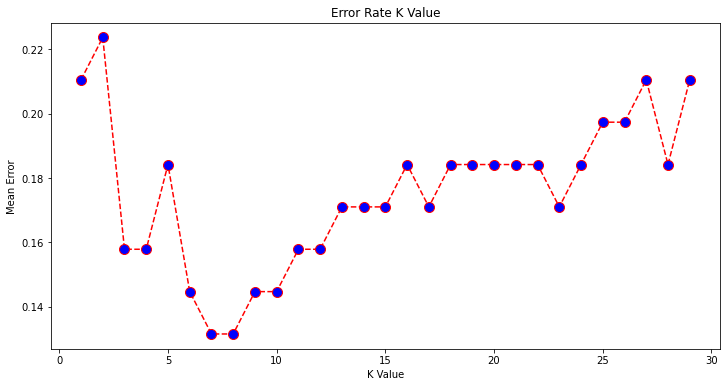

In [38]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)
prediction6 = model3.predict(x_test)
print(accuracy_score(prediction6,y_test))
acc_knn = (TP+TN)/(TP+TN+FN+FP)
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='BuPu',linewidths=0.3, linecolor='black',annot_kws={"size": 20})

## Descision Tree

              precision    recall  f1-score   support

           0       0.94      0.48      0.64        33
           1       0.71      0.98      0.82        43

    accuracy                           0.76        76
   macro avg       0.83      0.73      0.73        76
weighted avg       0.81      0.76      0.74        76



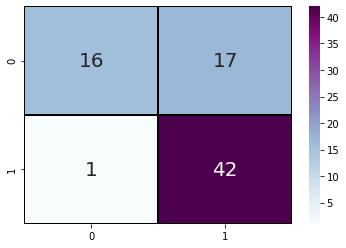

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
#cv_scores = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(x_test)
cm= confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='BuPu',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, prediction))

## Random Forset Classifier

0.8289473684210527
Testing Accuracy for Random Forest: 0.8289473684210527
Testing Sensitivity for Random Forest: 0.8571428571428571
Testing Specificity for Random Forest: 0.8125
Testing Precision for Random Forest: 0.7272727272727273


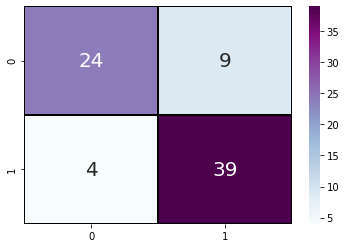

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model3 = rfc.fit(x_train, y_train)
prediction3 = model3.predict(x_test)
cm3=confusion_matrix(y_test, prediction3)
sns.heatmap(cm3, annot=True,cmap='BuPu',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
print(accuracy_score(prediction3,y_test))
acc_rf = (TP+TN)/(TP+TN+FN+FP)
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

## SVM

Testing Accuracy for SVM: 0.8552631578947368
Testing Sensitivity for Random Forest: 0.9230769230769231
Testing Specificity for Random Forest: 0.82
Testing Precision for Random Forest: 0.7272727272727273


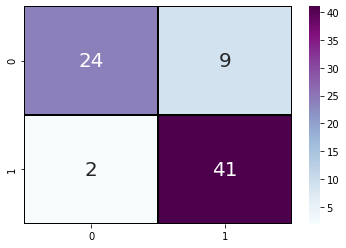

In [41]:
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model4=svm.fit(x_train,y_train)
prediction4=model4.predict(x_test)
cm4= confusion_matrix(y_test,prediction4)
sns.heatmap(cm4, annot=True,cmap='BuPu',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]
acc_svm = (TP+TN)/(TP+TN+FN+FP)
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

In [46]:
data = {'Algorithm name': ['Logistic Regression','KNN','SVM','Decision Tree','Random Forest'],
         'Accuracy': ['0.923','0.855','0.855','0.760','0.828']}
Accuracy_table = pd.DataFrame(data)
Accuracy_table

,Algorithm name,Accuracy
0,Logistic Regression,0.923
1,KNN,0.855
2,SVM,0.855
3,Decision Tree,0.760
4,Random Forest,0.828


In [47]:
print('Logistic Regression is the Machine Learning Algorith having the highest accuracy')

Logistic Regression is the Machine Learning Algorith having the highest accuracy
